In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.models import Sequential, load_model
from keras.layers import Dense
from keras.utils import to_categorical

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

2024-04-25 19:37:25.078881: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-25 19:37:25.081912: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-25 19:37:25.123196: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-25 19:37:25.872190: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# carrega o dataset iris
data = load_iris()
X = data.data
Y = to_categorical(data.target)

# mostra a estrutura dos dados de entrada X e de saída Y
print('Formato dos dados:')
print(X.shape)
print(Y.shape)

# mostra os primeiros exemplos do dataset (entrada e saída)
print('Primeiro exemplo do dataset:')
print('Entrada:', X[0])
print('Saida:', Y[0])

Formato dos dados:
(150, 4)
(150, 3)
Primeiro exemplo do dataset:
Entrada: [5.1 3.5 1.4 0.2]
Saida: [1. 0. 0.]


In [3]:
# separa 20% do dataset para servir como base de teste
# 80% dos dados serão usados para treinar a RNA
# 20% dos dados serão usados para testar a RNA
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(120, 4)
(30, 4)
(120, 3)
(30, 3)


In [4]:
# define a estrutura da RNA
model = Sequential()
model.add(Dense(6, kernel_initializer='normal', input_dim=4, activation='relu'))
model.add(Dense(3, kernel_initializer='normal', activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/home/santian/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# treina a RNA
history = model.fit(X_train, Y_train, validation_split=0.20, epochs=20)

Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 153ms/step - accuracy: 0.3255 - loss: 1.1016 - val_accuracy: 0.2917 - val_loss: 1.0978
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3724 - loss: 1.0983 - val_accuracy: 0.2917 - val_loss: 1.0982
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3763 - loss: 1.0975 - val_accuracy: 0.2917 - val_loss: 1.0989
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3763 - loss: 1.0965 - val_accuracy: 0.2917 - val_loss: 1.0993
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3880 - loss: 1.0953 - val_accuracy: 0.2917 - val_loss: 1.0995
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.3529 - loss: 1.0958 - val_accuracy: 0.2917 - val_loss: 1.0997
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3841 - loss: 1.0936 - val_accuracy: 0.2917 - val_loss: 1.1001
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.3724 - loss: 1.0929 - val_accuracy: 0.2917 - val_loss: 1.1003

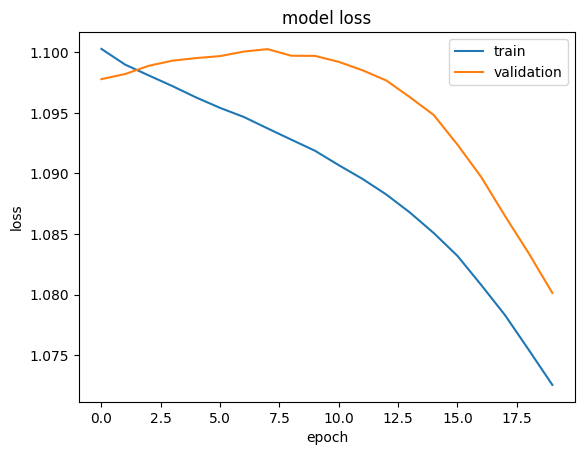

In [6]:
# mostra o histórico da função perda
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [7]:
# avalia o desempenho da RNA na base de treinamento
train_loss, train_acc = model.evaluate(X_train, Y_train, verbose=0)

#print('Train loss:', train_loss)
print('Train acc:', train_acc)

# avalia o desempenho da RNA na base de teste (que nunca foi apresentada para a RNA no seu treinamento)
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=0)

#print('Test loss:', test_loss)
print('Test acc:', test_acc)

Train acc: 0.675000011920929
Test acc: 0.6333333253860474


In [8]:
# exemplo de como realizar a predição de um exemplo qualquer
predict = model.predict(X_test[1:2])

print(X_test[1:2])
print(Y_test[1:2])
print(predict)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
[[5.7 3.8 1.7 0.3]]
[[1. 0. 0.]]
[[0.34775198 0.34278154 0.3094665 ]]
